What is the goal of Document Image Analysis?

It must be automatic building of content database with minimum user interaction. 

Traditional way of doing it is:
1. image preprocessing
1. blob detection and bouning box segmentation
1. recognition of each bounding box separately
1. recognition of spatially consecutive bounding boxes.

Here, we will play with a document image and try to segment out blobs of characters with some image processing and filtering.

References
1. https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
1. http://www.mdpi.com/2313-433X/4/2/43/htm
1. http://digitalnk.com/blog/2017/09/15/ocr-for-north-korean-archival-data-part-1-2/

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
print (cv.__version__)

3.3.1


Let's consider a scanned image of a book.

In [2]:
imagefilename = '020-021.jpg'
img = cv.imread (imagefilename)
img.shape

(2012, 2700, 3)

img is a `numpy` type array. Its dimension can be retrived by the command `img.shape`

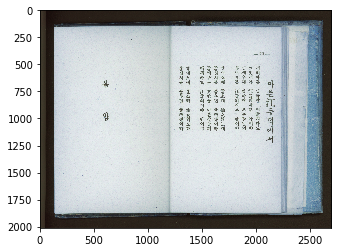

In [3]:
plt.imshow (img)
plt.show()

Too small to see what's in the image.

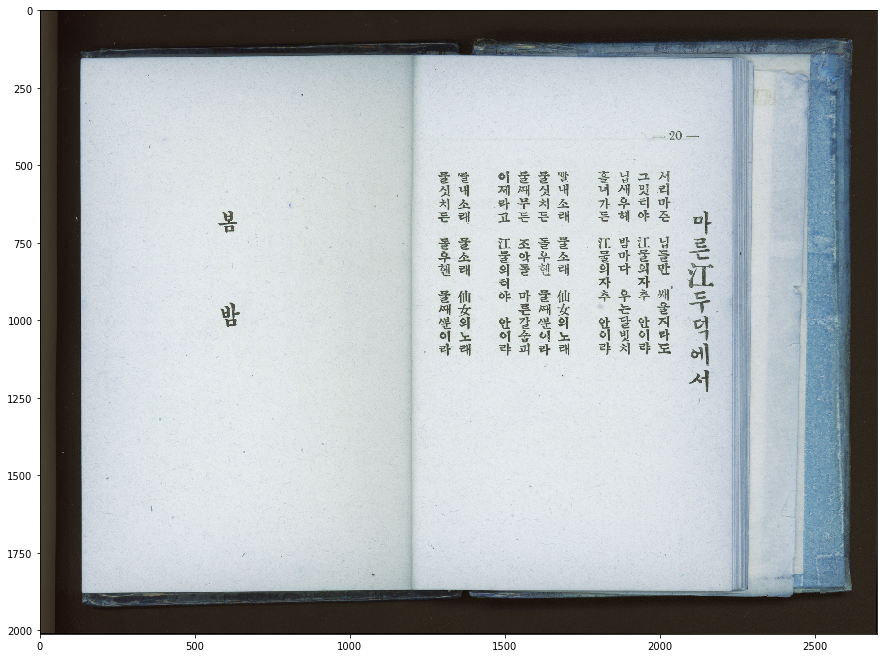

In [4]:
plt.figure (figsize=(15,15))
plt.axis('on')
plt.imshow (img)
plt.show()

1. We don't need all of the images. boundary parts are not useful. Maybe we can remove non-content part automatically, but later.
1. Simply use `gimp` to crop & save it to a PNG file.

(944, 1660, 3)
pixel value at (r=100, c=200) =  [220 226 225]


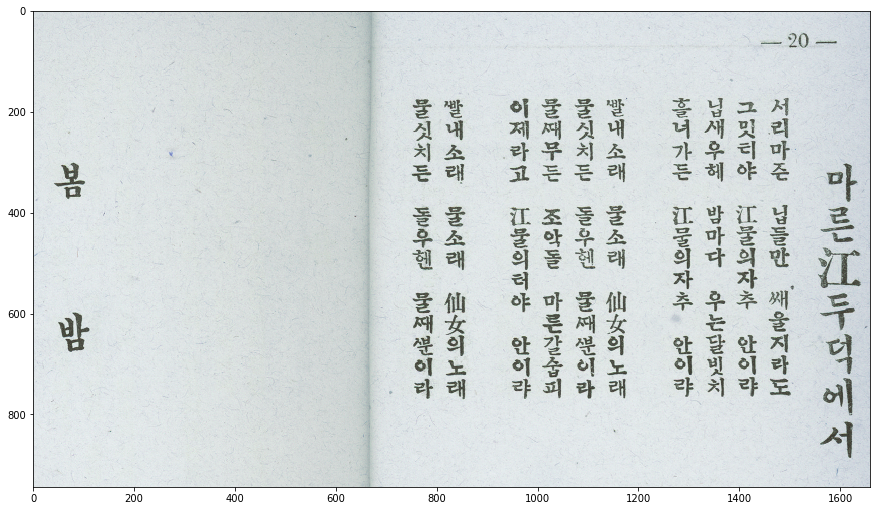

In [5]:
cropped = cv.imread ('020-021-cropped.png')
print (cropped.shape)
print ('pixel value at (r=100, c=200) = ', cropped[100,200])
plt.figure (figsize=(15,15))
plt.imshow (cropped)

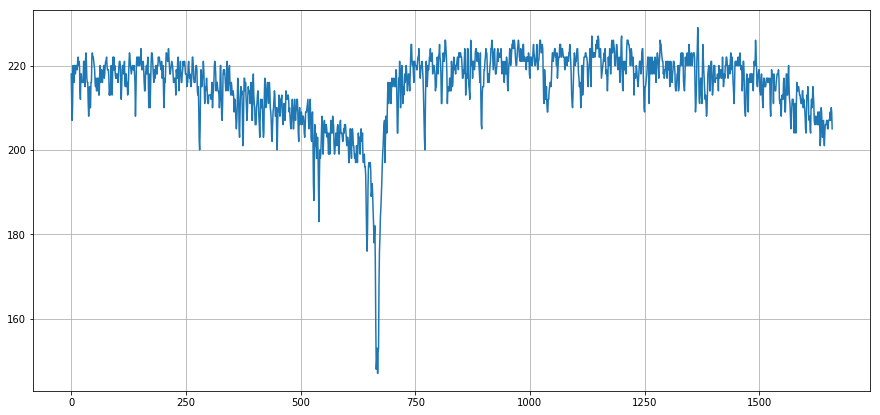

In [6]:
pixels1d = cropped[100, :, 0]
plt.figure (figsize = (15, 7))
plt.grid (True)
plt.plot (pixels1d)

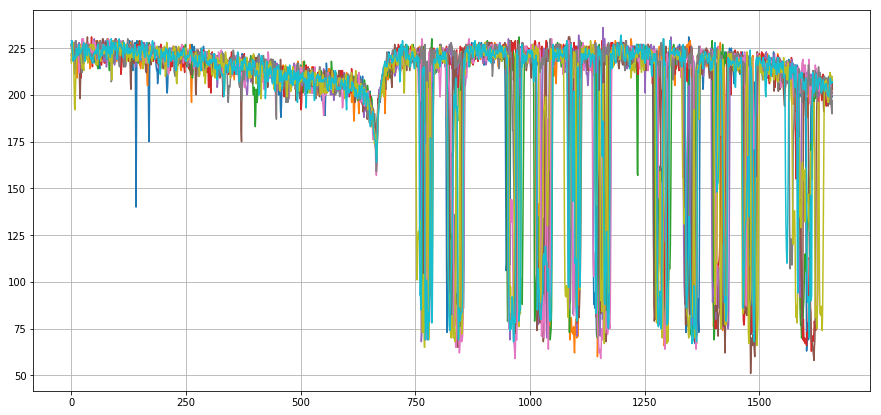

In [7]:
plt.figure (figsize = (15, 7))
plt.grid (True)
for row in range (400, 500, 10):
    pixels1d = cropped[row, :, 0]
    plt.plot (pixels1d)
plt.show()

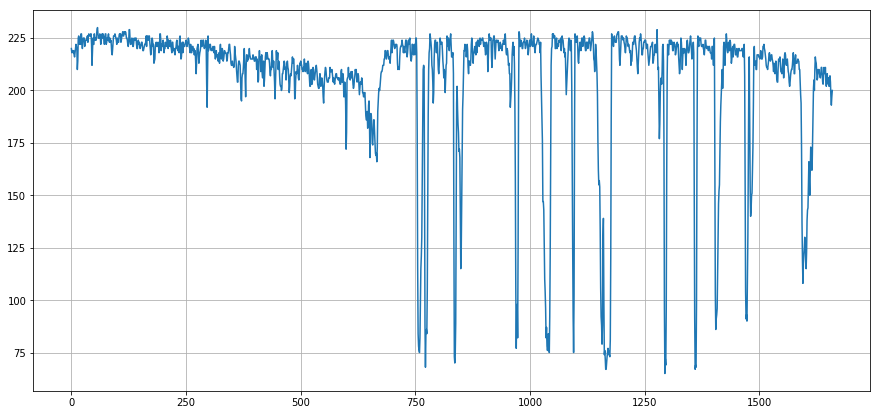

In [8]:
row = 458
pixels1d = cropped[row, :, 0]
plt.figure (figsize = (15, 7))
plt.grid (True)
plt.plot (pixels1d)

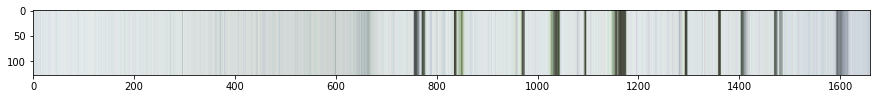

In [9]:
rowimage = cropped[row:row+1]
for i in range (7):
    rowimage = np.vstack ((rowimage, rowimage))
plt.figure (figsize=(15,10))
plt.imshow (rowimage)

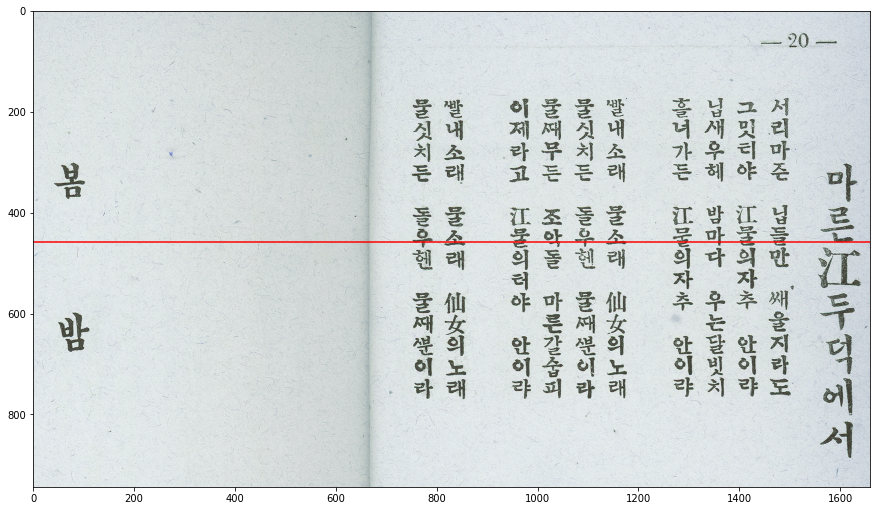

In [10]:
fig, ax = plt.subplots(1, figsize=(15,15))
ax.imshow (cropped)
ax.axhline(y=row, color='r', linestyle='-')

1. Maybe we don't need RGB color representation. So, let's convert it to a gray scale image.
2. Let's examine its histogram.

gray dimension (height x width) =  (944, 1660)
pixel value at (r=100, c=200) =  224


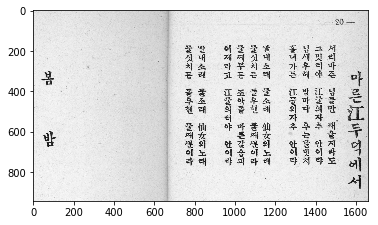

In [11]:
gray = cv.cvtColor (cropped, cv.COLOR_RGB2GRAY)
print ('gray dimension (height x width) = ', gray.shape)
print ('pixel value at (r=100, c=200) = ', gray[100,200])
plt.imshow (gray, cmap='gray') # without cmap='gray', a wiered color will be shown

Histogram

In [12]:
hist1d = np.zeros (256)
print (hist1d)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [13]:
hist1d[0:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [14]:
for r in range(gray.shape[0]):
    for c in range(gray.shape[1]):
        intensity = gray[r,c]
        hist1d[intensity] += 1
    #
#

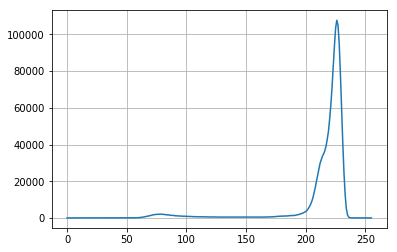

In [15]:
plt.grid(True)
plt.plot (hist1d)

Let's do binarization of the image, by choosing a threshold.

In [16]:
threshold = 160

binary = gray.copy()
for r in range (binary.shape[0]):
    for c in range (binary.shape[1]):
        binary[r,c] = 0 if binary[r,c] < threshold else 255
    #
#

cv.imwrite ('binary.png', binary)

True

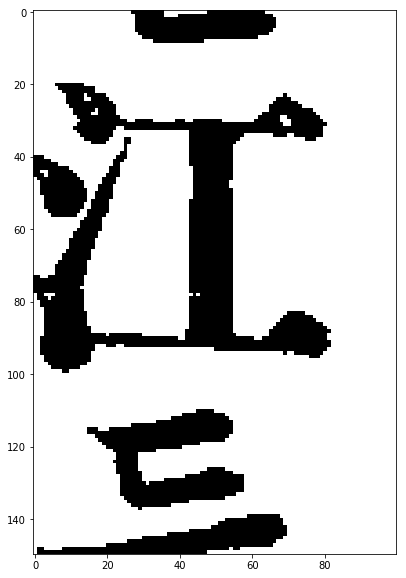

In [17]:
plt.figure (figsize=(10,10))
plt.imshow (binary[450:600,1560:1960], cmap='gray')

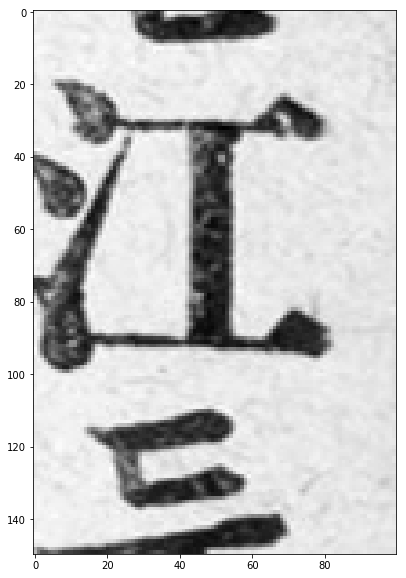

In [18]:
plt.figure (figsize=(10,10))
plt.imshow (gray[450:600,1560:1960], cmap='gray')

Median Filter + Sobel Thresholding

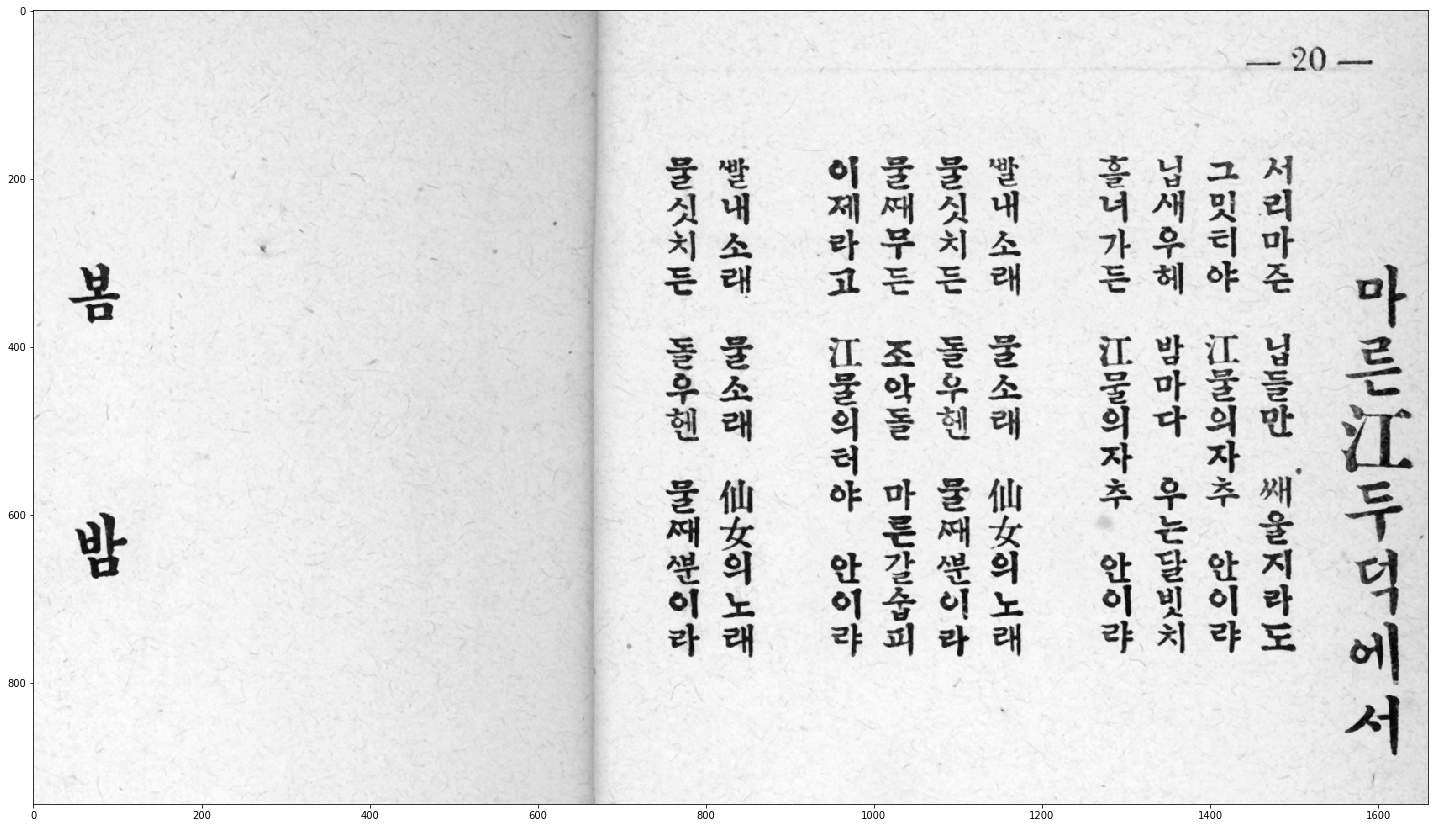

In [19]:
median = cv.medianBlur (gray, 3)

plt.figure (figsize=(25,25))
plt.imshow (median, cmap='gray')

In [20]:
def gimshow (gimg, figsize=(25,25)):
    plt.figure (figsize=figsize)
    plt.imshow (gimg, cmap='gray')

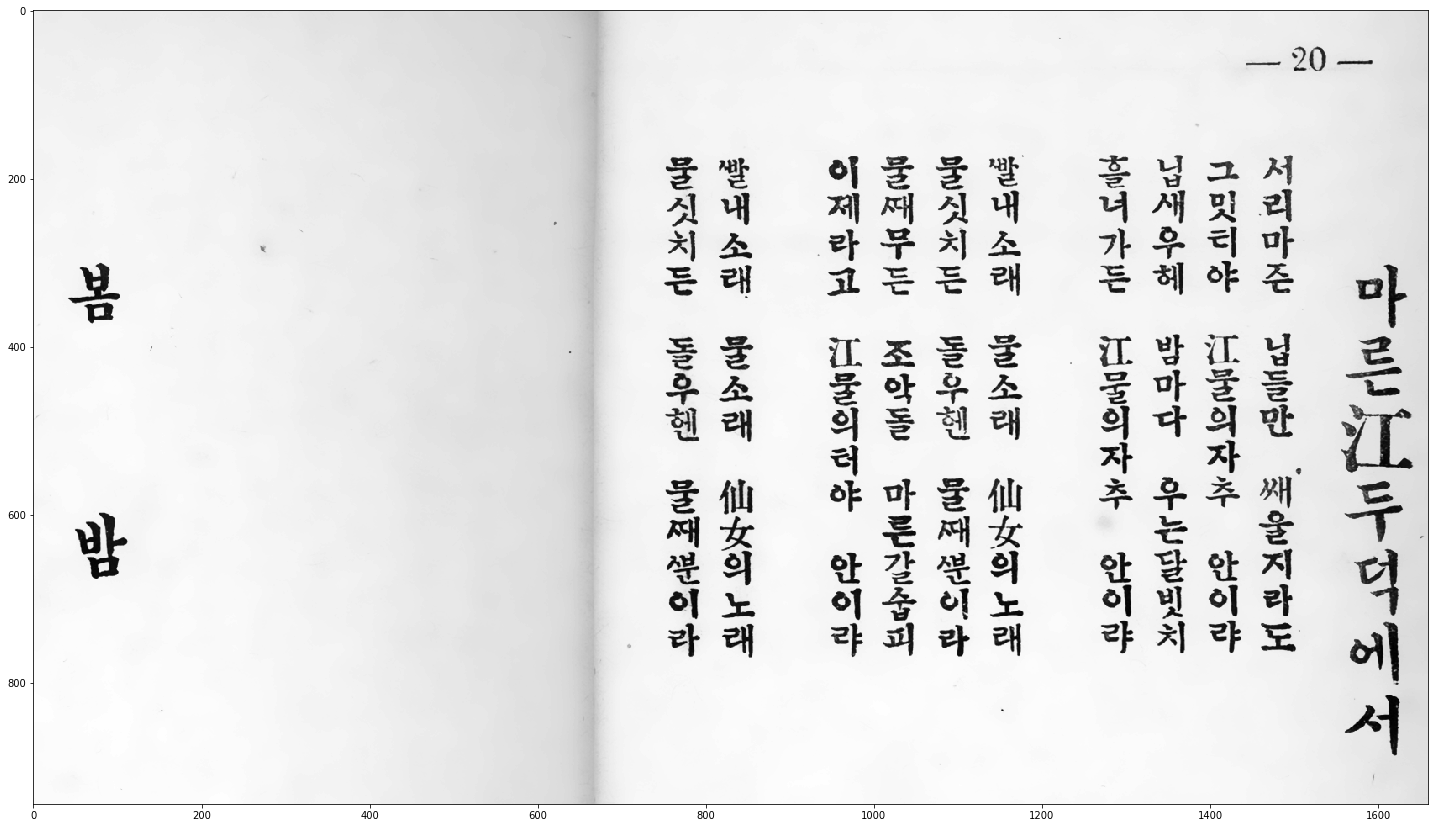

In [21]:
bil = cv.bilateralFilter (gray, -1, 17, 12)
gimshow (bil)

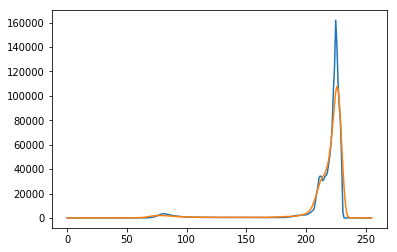

In [22]:
hist = [cv.calcHist([bil],[0],None,[256],[0,256]), cv.calcHist([gray], [0], None, [256], [0,256]) ]
plt.plot (range(256), hist[0], range(256), hist[1])

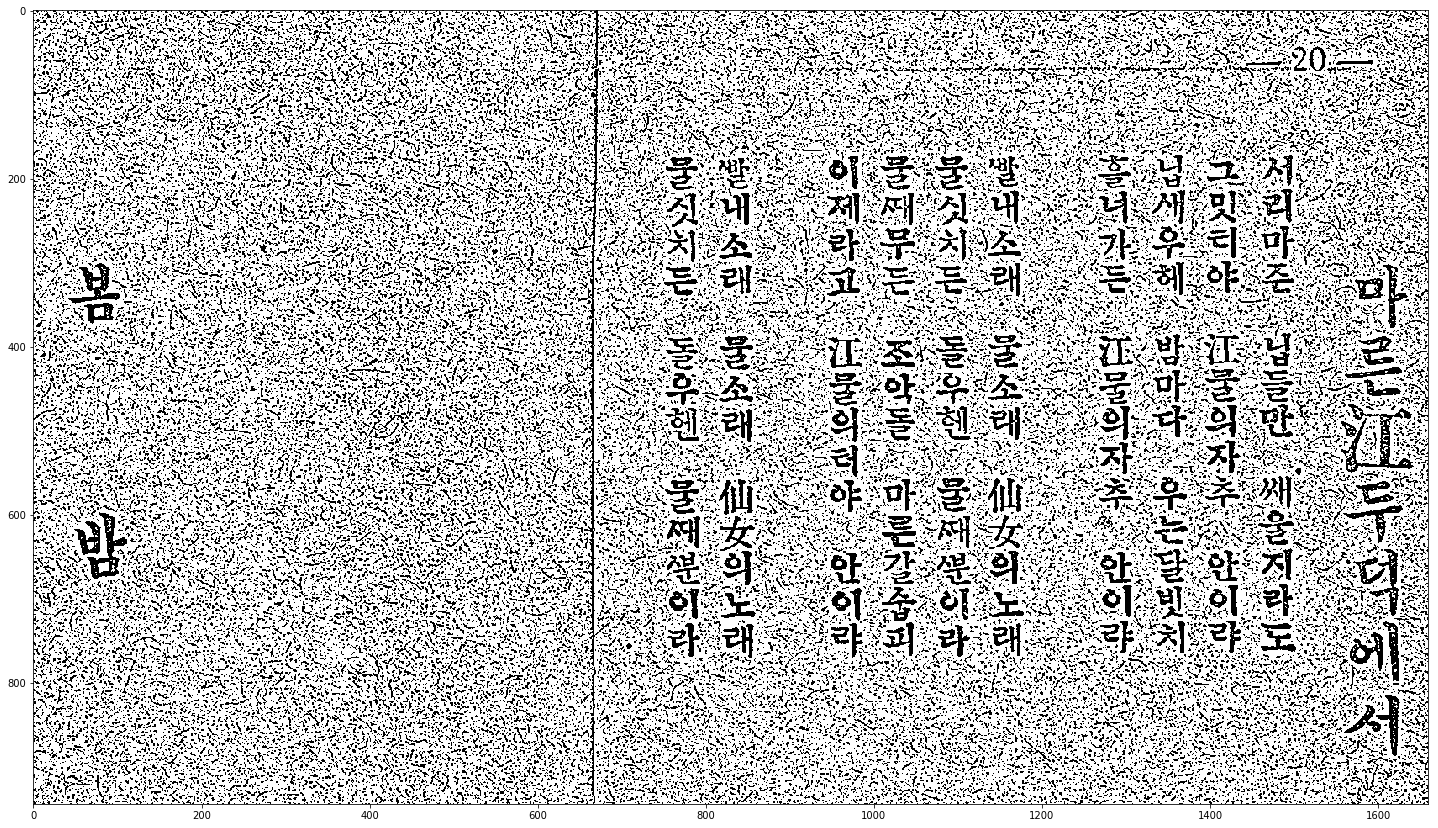

In [23]:
th3 = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
gimshow (th3)

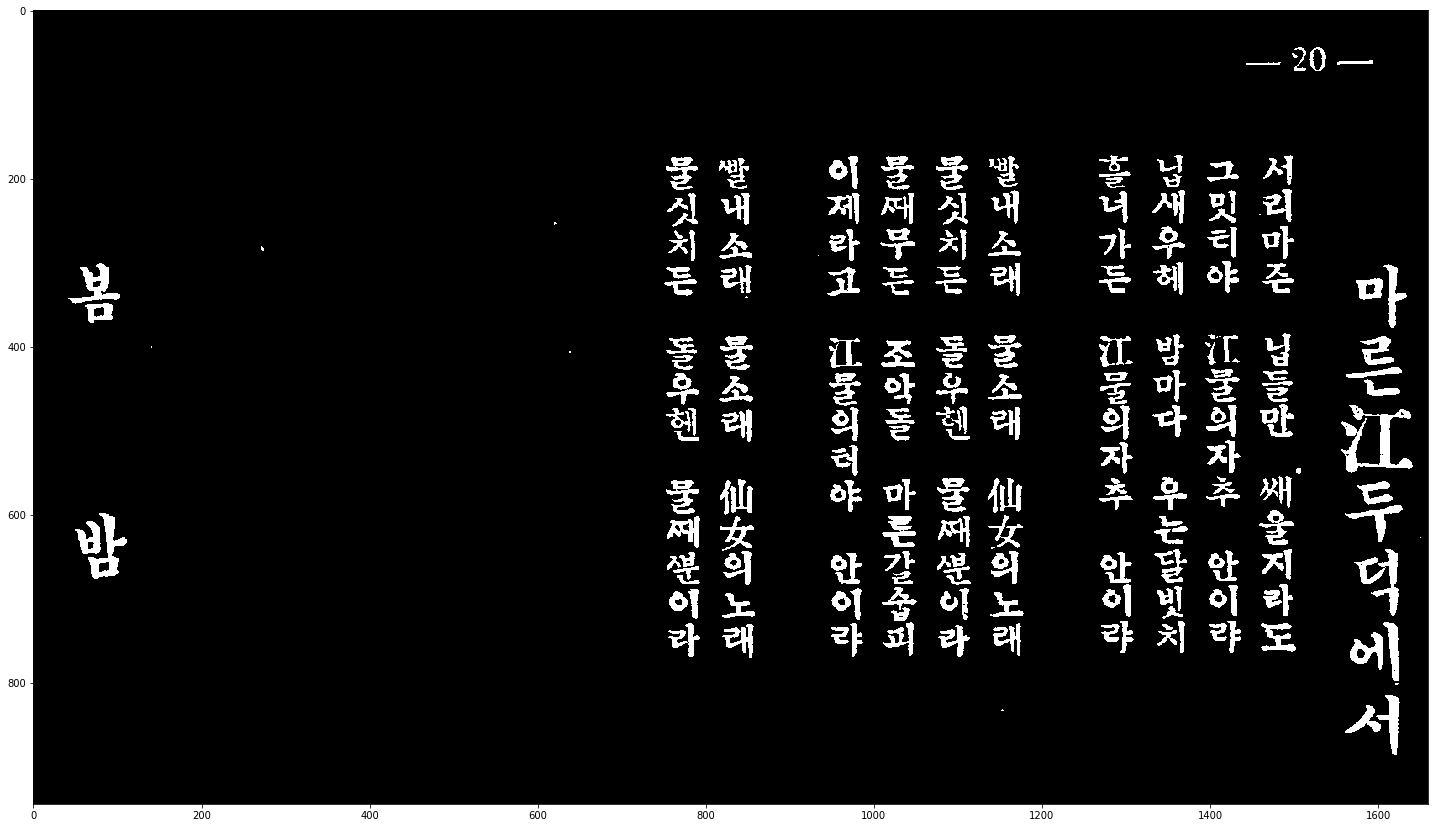

In [24]:
ret, th1 = cv.threshold (bil, 160, 255, cv.THRESH_BINARY_INV)
gimshow (th1)

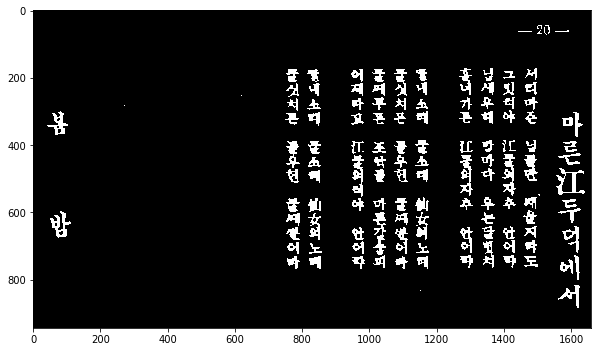

In [25]:
kernel = np.ones ((5,5))

res = cv.morphologyEx (th1, cv.MORPH_CLOSE, kernel)
gimshow (res, (10,10))

0.0 (1660,) (944, 1660)


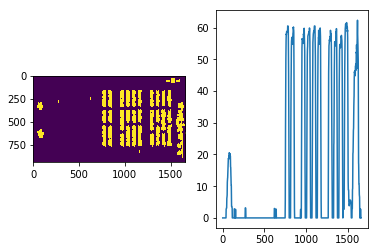

In [26]:
def projVertical (input):
    k20x5 = np.ones((25,5))
    resv = cv.morphologyEx (input, cv.MORPH_DILATE, k20x5)
    vproj = np.zeros ((resv.shape[1]), dtype=np.float32)
    print(vproj[-1], vproj.shape, resv.shape)
    plt.subplot (121)
    plt.imshow (resv)
    for c in range (resv.shape[1]):
        for r in range (resv.shape[0]):
            vproj[c] += resv[r,c]

    vproj = vproj * 100 / resv.shape[0] / 255
    plt.subplot (122)
    plt.plot (vproj)
    return vproj
#
vproj = projVertical (th1)


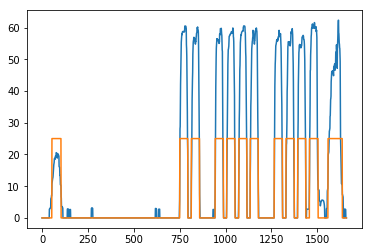

In [27]:
vp = vproj.copy ().astype (np.float32)
for i in range(vproj.shape[0]):
    vp[i] = 25 if vproj[i] > 10 else 0
    
plt.plot (range(vproj.shape[0]), vproj, range(vproj.shape[0]), vp)

In [28]:
def getBounds (vp):
    vstripList = []
    vpulse = np.zeros(vp.shape, dtype=np.float32)
    crange = range (vp.shape[0])
    #print (crange)
    for i in crange:
        vpulse[i] = vp[i] - vp[i-1];
        if vpulse[i] > 0:
            start = i
        elif vpulse[i] < 0:
            vstripList.append ( (start, i) )
    #plt.plot (vpulse)
    return vstripList
#
vstripList = getBounds (vp)
print (vstripList, len(vstripList))

[(54, 104), (751, 795), (814, 859), (944, 989), (1007, 1052), (1073, 1117), (1135, 1179), (1266, 1311), (1330, 1375), (1394, 1438), (1458, 1505), (1559, 1637)] 12


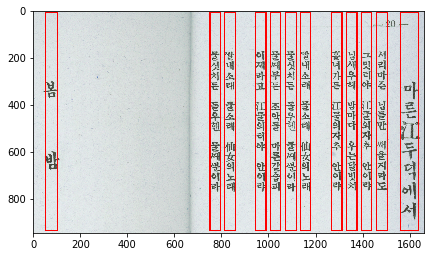

In [29]:
vboximg = cropped.copy()
for i in range(len(vstripList)):
    cv.rectangle (vboximg, (vstripList[i][0], 10), (vstripList[i][1], th1.shape[0]-10), (255, 0, 0), 3)
gimshow (vboximg, (7,7))

In [30]:
def projHori (vimg):
    k5x10 = np.ones ((5,10))
    fil = cv.morphologyEx (vimg, cv.MORPH_DILATE, k5x10)
    proj = np.zeros ((vimg.shape[0]))
    for r in range (vimg.shape[0]):
        for c in range (vimg.shape[1]):
            proj[r] += fil[r,c]
    proj = proj * 100 / 255 / vimg.shape[1]
    #gimshow (proj, (8,9))
    return proj

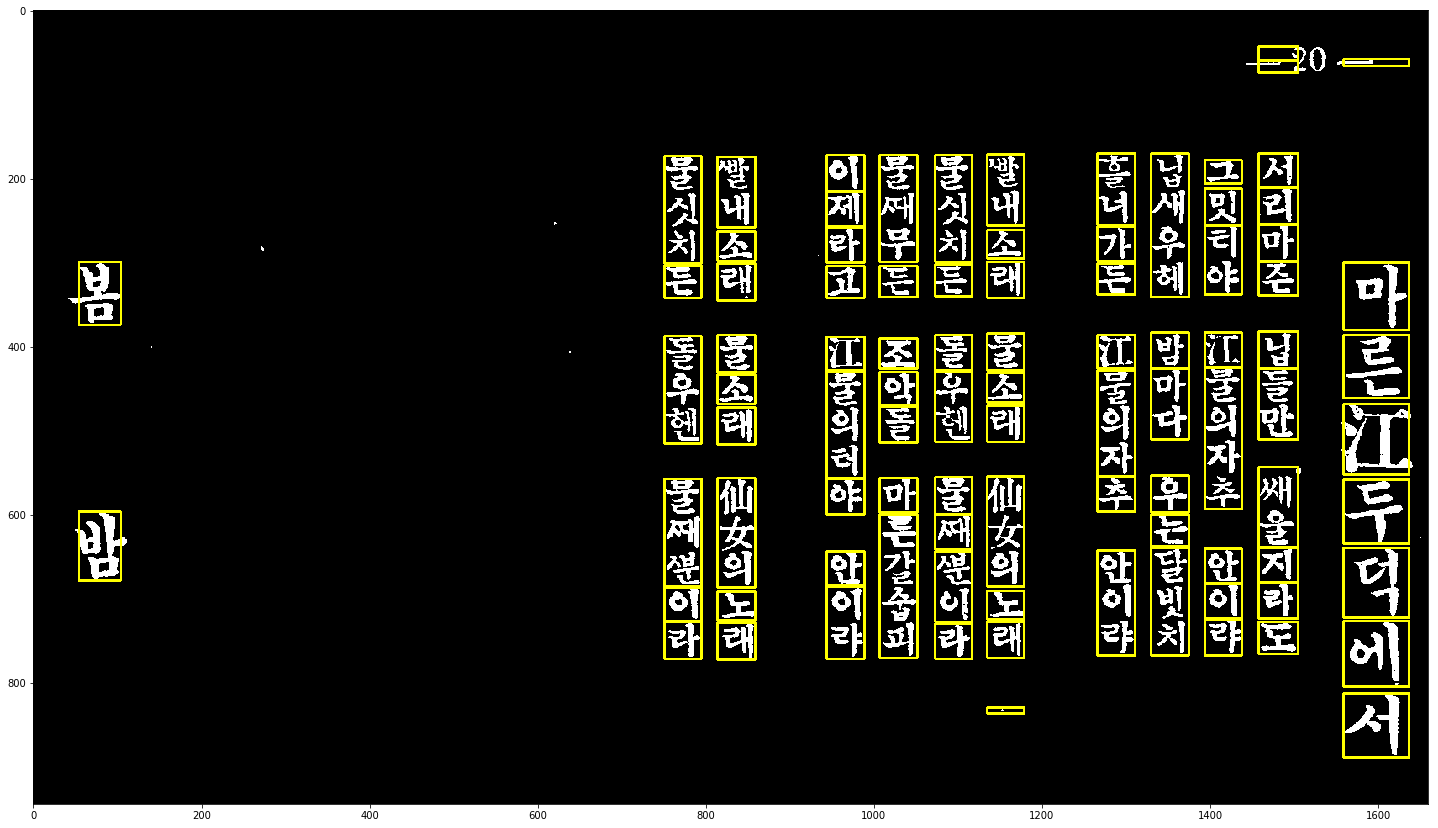

In [31]:
disp = cv.merge ((th1,th1,th1)) # vboximg.copy()
boxList = []
for ii in range(len(vstripList)):
    cc = vstripList[ii]
    #print (cc)
    #gimshow (th1[:,cc[0]:cc[1]], (5,5))
    hproj = projHori (th1[:,cc[0]:cc[1]])
    #
    hp = hproj.copy()
    for i in range (hp.shape[0]):
        hp[i] = 25 if hp[i] > 10 else 0
    #
    #plt.plot (hp)
    #plt.show ()
    rrList = getBounds (hp)
    #print (rrList)
    for rr in rrList:
        box = ((cc[0], rr[0]), (cc[1], rr[1])) # lt, rb
        boxList.append (box)
        #print (box)
        color = (255, 255, 0)
        cv.rectangle (disp, box[0], box[1], color, 2)
gimshow (disp, (25,25))

labels =  272
[1500   44   15   28  134]
[206 155 199]


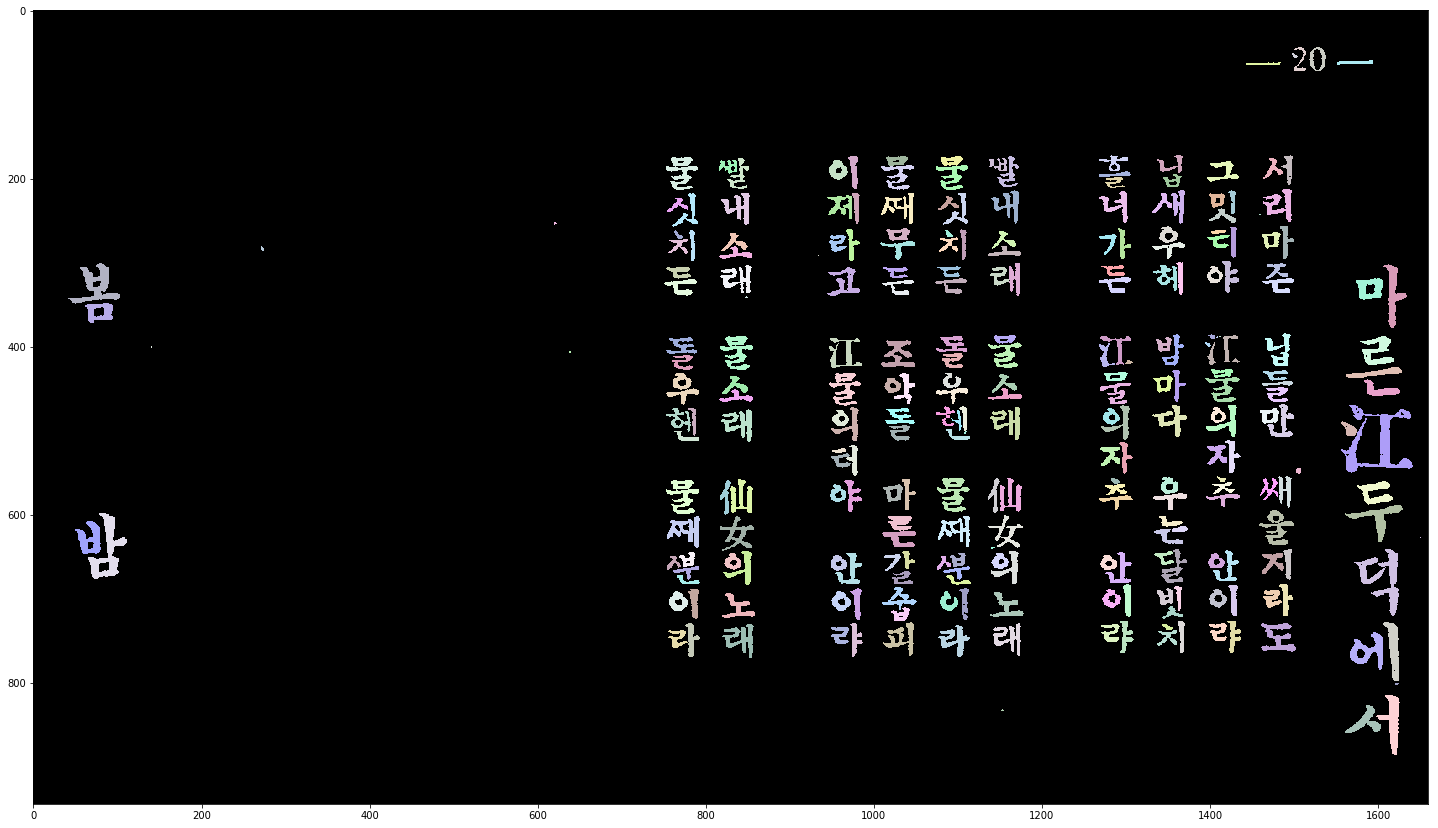

In [34]:
connectivity = 8
# Perform the operation
output = cv.connectedComponentsWithStats(th1, connectivity, cv.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]
#
print ('labels = ', num_labels)
print (stats[1])


def randval():
    return np.uint8(np.random.random()*100+155)

colors = {}
colors[0] = np.array([0,0,0])
for i in range (1,num_labels+1):
    colors[i] = np.array( [randval(), randval(), randval()] )
print (colors[100])

def makeLabelImage (labels):
    cclimg = cv.merge ((labels,labels,labels))
    for r in range (labels.shape[0]):
        for c in range (labels.shape[1]):
            cclimg[r,c] = colors[ labels[r,c] ]
    return cclimg
#            
cclimg = makeLabelImage (labels)   
gimshow (cclimg)

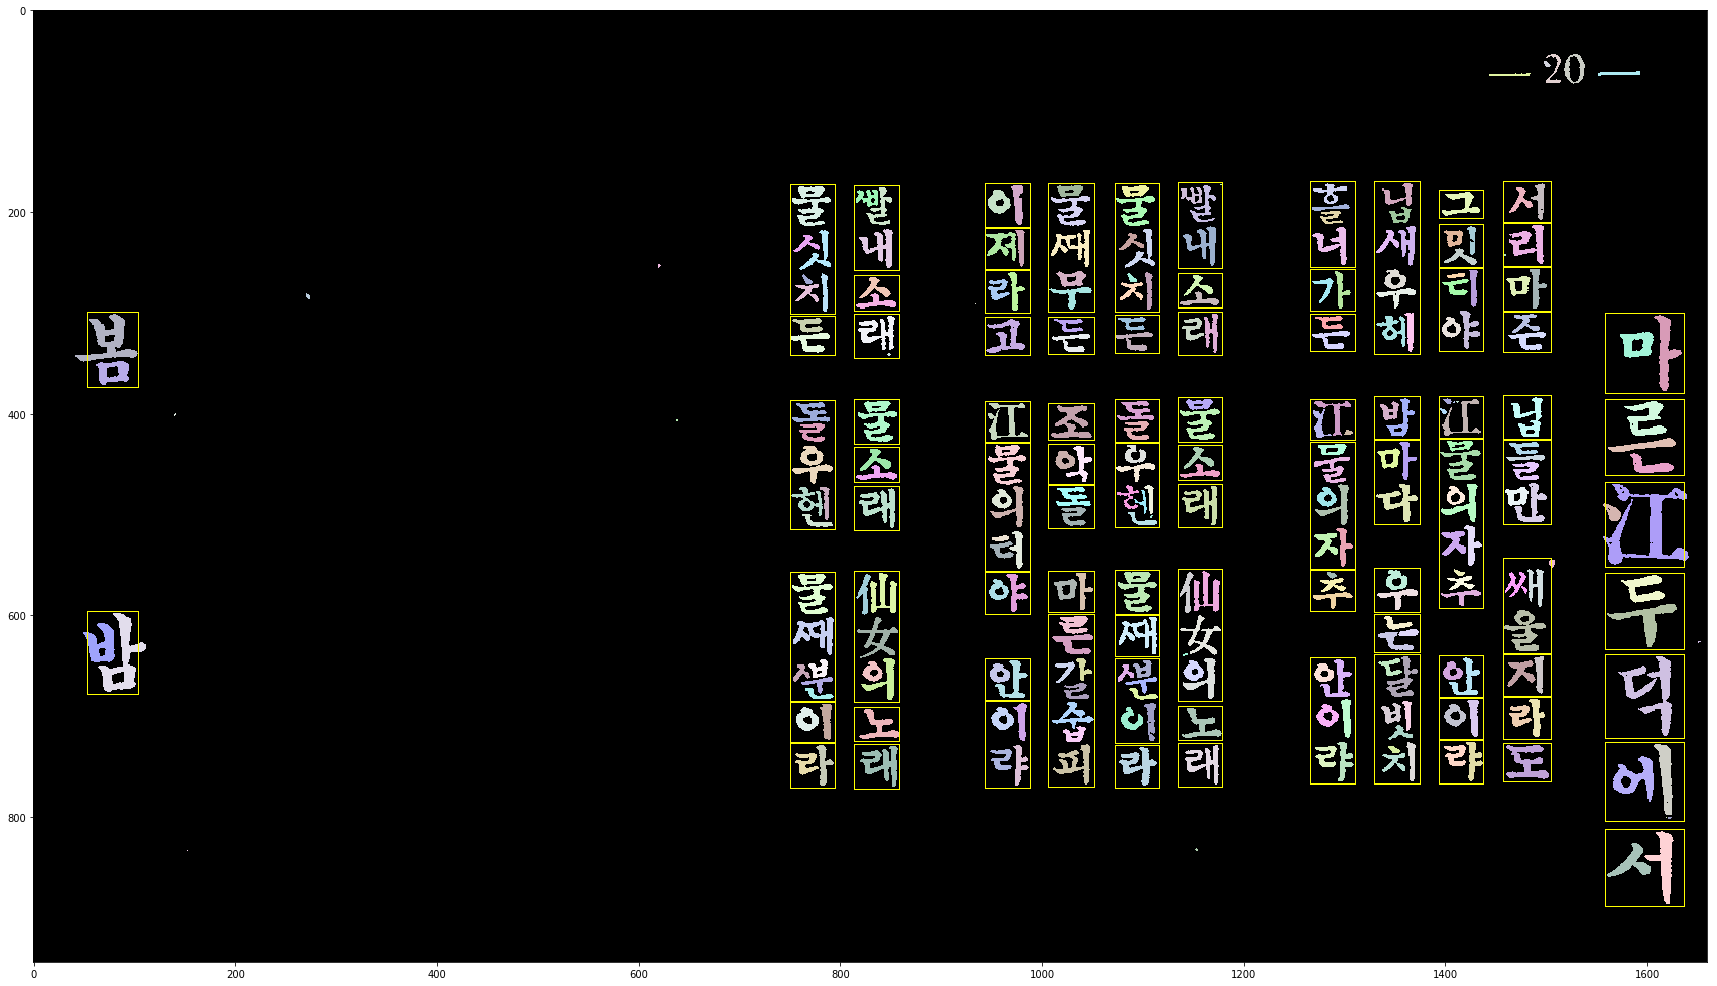

In [41]:
boxWidth = []
cclboximg = cclimg.copy()
boxColor = (255, 255, 0)
#print (boxList)
for box in boxList:
    bwi = box[1][0] - box[0][0]
    bhe = box[1][1] - box[0][1]
    if bwi > 20 and bhe > 20:
        cv.rectangle (cclboximg, box[0], box[1], boxColor, 1, 1)
        boxWidth.append (bwi)
gimshow (cclboximg, (30,30))

In [ ]:
plt.plot (boxWidth, 'r.')
print (sorted(boxWidth))
count, xx = np.histogram (boxWidth)
boxWidthMedian = np.median (xx)
print ('boxWidthMedian = ', sorted(boxWidth)[int(len(boxWidth)/2)])

In [ ]:
plt.hist (boxWidth)